# Particle Tracker for torsions

#### Setup: Load modules and define format for plots

In [1]:
# LOAD MODULES
from __future__ import division, unicode_literals, print_function

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

mpl.rc('figure', figsize=(4,4))
mpl.rc('image', cmap='gray')

import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import pims
import trackpy as tp

@pims.pipeline
def gray(image):
	return image[:,:,1]

#### Specify path to video file or the directory containing the frames of the video

In [2]:
path = '/Users/jorgeaugustomartinezortiz/Library/CloudStorage/OneDrive-BaylorUniversity/CASPER/projects/plasma_crystal/crystal_analysis/crystal_videos/LP_20221006_crop.avi'
video = gray(pims.PyAVReaderIndexed(path))
video

(PyAVReaderIndexed,) processed through proc_func. Original repr:
    <Frames>
    Source: /Users/jorgeaugustomartinezortiz/Library/CloudStorage/OneDrive-BaylorUniversity/CASPER/projects/plasma_crystal/crystal_analysis/crystal_videos/LP_20221006_crop.avi
    Length: 2024 frames
    Frame Shape: (624, 960, 3)
    

#### Start identifying particles
Go ahead and mess around with the particle sizes and masses until you are satisfied with the tracking

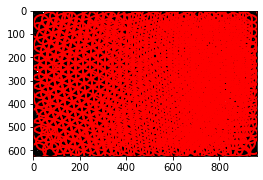

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,10.046690,768.731087,924.166319,3.352956,0.066713,80.837243,1641.0,0.023868,0
1,11.570484,131.903266,1321.251966,2.137095,0.111553,117.978679,2040.0,0.019162,0
2,12.256385,302.453831,556.029145,3.487981,0.044789,45.880597,1005.0,0.039222,0
3,12.237598,852.118799,836.774705,2.539762,0.075070,78.106255,1322.0,0.029699,0
4,13.319532,421.416742,606.825520,2.580129,0.048858,61.720327,1039.0,0.037918,0
...,...,...,...,...,...,...,...,...,...
683,613.210526,896.736842,249.066100,5.796626,0.235375,7.100569,339.0,0.120193,0
684,611.776368,246.009516,1377.510317,2.186579,0.127668,127.264038,1879.0,0.020818,0
685,611.744079,336.605042,714.972643,2.242039,0.172689,75.921465,1104.0,0.035652,0
686,611.589431,692.483740,671.823033,1.896509,0.173958,73.736674,849.0,0.046571,0


In [3]:
frame = 0
radius = 21
mass = 200
f = tp.locate(video[frame],radius,minmass=mass)
tp.annotate(f,video[frame])
f

If you like how the tracking is looking overall, we can move on to save everything into a csv so that it can now be processed in matlab

In [6]:
f = tp.batch(video[0:1000], radius, minmass=mass, processes=1)

Frame 999: 685 features


#### Link trajectories

In [7]:
t = tp.link(f, 5, memory=20)
t

Frame 999: 685 trajectories present.


,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,10.046690,768.731087,924.166319,3.352956,0.066713,80.837243,1641.0,0.023868,0,0
452,403.556565,805.443435,661.445279,2.131902,0.102953,64.997513,847.0,0.046683,0,1
453,404.651278,902.070074,662.537674,2.511638,0.174974,73.736674,889.0,0.044436,0,2
454,406.589106,413.297915,812.195814,1.807665,0.124574,81.929638,1005.0,0.039222,0,3
455,406.077325,468.293626,522.711092,1.654922,0.237103,60.081735,668.0,0.059507,0,4
...,...,...,...,...,...,...,...,...,...,...
680697,207.522345,595.688334,953.801388,2.265976,0.150962,91.892647,1423.0,0.093607,999,673
680698,207.778051,157.171171,675.909167,2.099101,0.113522,65.874849,1012.0,0.138683,999,674
680699,208.947528,905.327952,548.588030,3.714183,0.253711,43.178473,1011.0,0.138846,999,669
680691,198.882834,929.123706,1015.801246,3.065320,0.142557,91.892647,1637.0,0.080058,999,614


In [15]:
with tp.PandasHDFStore('data.h5') as s:
    tp.batch(images, 11, invert=True, output=s)

<bound method NDFrame.head of                    y           x        mass      size       ecc     signal  \
0           2.268775  759.679842   80.700788  1.154130  0.046935  16.586723   
987       624.811870  812.235162  284.845075  1.029248  0.244087  65.389967   
986       624.572930  364.572930  242.740316  1.112585  0.281284  50.398121   
985       624.210983  838.682081  220.731010  1.061682  0.209927  47.846317   
984       623.713299  681.820380  184.686785  1.048068  0.189785  41.785784   
...              ...         ...         ...       ...       ...        ...   
5153555   309.073550  163.233380  230.709413  1.128893  0.424619  45.685032   
5153554   308.121729  710.592719  286.836738  1.093470  0.158665  60.369507   
5153553   307.429495  229.351876  252.246642  1.076624  0.343341  53.843074   
5153562   313.226087  739.966667  225.161945  1.084141  0.167648  48.621927   
5154541  1016.918591  760.628190  268.562725  1.052105  0.238039  59.716864   

         raw_mass    

#### Save data into a file

In [8]:
t.to_csv('/Users/jorgeaugustomartinezortiz/Library/CloudStorage/OneDrive-BaylorUniversity/CASPER/projects/plasma_crystal/crystal_analysis/torsions_datasets/laser_pulse_20221006_crop_0_999.csv',index_label=False)